# COGS 108 - Final Project 

#  Overview

Movies have been an important part of entertainment industry of all cultures for decades. In each year, thousands of movies are produced in the United States. Some movies have high gross income compared to the production cost, while others underperform. We began to wonder what are the characteristics of movies that have low gross income over budget ratio. With the power of data analysis, we hope to figure out if there are certain characteristics or trends that distinguish these movies.

# Names

- En-Yu Chen
- Ghassan Haddad
- Sunny Lau
- Longsheng Zhao 
- Gretal Dea

# Group Members IDs

- A14904144
- A14169330
- A14349072
- A13952226
- A13800009

# Research Question
What are the characteristics (release month, genre, budget, rating) of movies that have low gross over budget ratio in the United States?

## Background and Prior Work

As a team, we wanted to focus on the characteristics of movies that have low gross income over budget ratio. We thought that this is interesting because by unserstanding the common characteristics and trends among this group of movies, we could come to a conclusion on why some movies underperform compared to others

there are conflicting views about which factors contribute more to the success of a movie. For example, the following paper found that he most significant factor is the production cost while it believes that there is no linear relationship between a holiday release and revenue. Link to the paper:
https://pdfs.semanticscholar.org/c960/7aaa7746ec9735a19d0ab2e524e53d20ab7f.pdf

On the other hand, there are many studies that consider the release date as a crucial factor in
determining the success and revenue of a film. For example, the following paper considers the
release date as one of the most important factors in determining the success of a film. Link to the
paper:
http://people.stern.nyu.edu/jsimonof/movies/movies.pdf

References (include links):
- 1) https://pdfs.semanticscholar.org/c960/7aaa7746ec9735a19d0ab2e524e53d20ab7f.pdf
- 2) http://people.stern.nyu.edu/jsimonof/movies/movies.pdf

# Hypothesis
We predict that movies with low gross over budget ratio will most likely not be released during the holiday season (summer vacation, and christmas break).
Additionally, we also predict that these movies will have low viewer rating and will be mainly of certain genres like History and Biography.



# Dataset

There are many datasets about movies that can be used to answer our question. We found a particular  dataset on kaggle that contains movie data through three decades (1986-2016), scraped from IMDB using Python.
Link to the dataset:
https://www.kaggle.com/danielgrijalvas/movies

This dataset contains 6820 observations and 15 columns. Each observation has the following attributes as appears in the website: 
- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release


# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning / Preprocessing

1) Loading the data


In [2]:
 df = pd.read_csv('movies.csv', encoding='latin1')
# Checking out the data
df.head(6)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986


2) Finding if there are rows with missing data

In [3]:
missingDataDf = df[df.isnull().any(axis=1)]
# Checking the size of the dataframe
missingDataDf.shape

(0, 15)

This shows that our dataset does not include rows with missing data

3) Our research hypothesis focuses only on movies produced in the United States, so we'll keep only the entries where the country field = USA

In [4]:
df = df[df['country'] == 'USA']
# checking the size of the dataset
df.shape

(4872, 15)

Our dataset now contains 4872 rows and 15 columns

4) looking at the min values in the budget and gross fields

In [5]:
df['budget'].min() 

0.0

In [6]:
df['gross'].min() 

309.0

5) Dealing with entries where the budget is zero

In [7]:
# finding how many rows with budget = 0
len(df[df['budget'] == 0])

1146

This shows that there are 1146 entries out of 4872 where the budget is zero. This is a large number so we'll test to see if there is a statistical significance between the gross income of movies where the budget is specified and movies where the budget is zero before deciding if we are going to keep these entries or not. This will give us some sense whether the movies with zero budget are usually unimportant movies with low box office grossing.

In [8]:
# saving the gross data for all movies where the budget equals zero 
#in a variable called dataZero
dataZero = df[df['budget'] == 0]['gross'].values
# saving the gross data for all movies where the budget does not 
#equal zero in a variable called dataNonZero
dataNonZero = df[df['budget'] != 0]['gross'].values


# getting the mean of gross of each group
avg_Dzero = np.mean(dataZero)
avg_DnonZero= np.mean(dataNonZero)

t_val, p_val = stats.ttest_ind(avg_Dzero, avg_DnonZero)
# Check if statistical test passes significance, using an alpha value of 0.01.
if p_val < 0.01:
    print('there is a significant difference!')
else:
    print('There is NOT a significant difference!')
    
# note: source of code: assignment 4    


There is NOT a significant difference!


C:\Users\CodeGirl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\CodeGirl\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\CodeGirl\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\CodeGirl\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\CodeGirl\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The result suggests that there is nothing special about  the gross income of entries in the dataset where the budget is zero  compared to entries where the budget is not zero. So, the last step in our data cleaning is to remove entries where the budget is equal to zero

In [9]:
df = df[df['budget'] > 0]

# checking the size of our dataset now
df.shape

(3726, 15)

6) Adding a field to our dataset that includes the release month which will be extracted from the released field which has the format (YYYY-MM-DD)

In [10]:
df['released_month'] = df['released'].apply(lambda x: pd.to_datetime(x).month)

# Data Visualization

1) First, we're going to plot the distribution of the budget field

Text(0.5,1,'Budget Data')

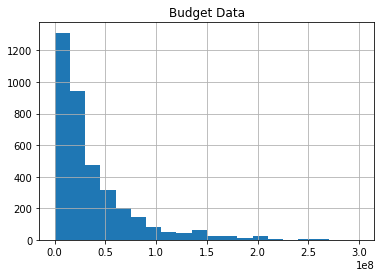

In [11]:
df.hist(column= 'budget', bins=20, )
plt.title('Budget Data')

The budget data is not normally distributed. We will perform a log transformation on the budget values and save the values in a new field called budget10

In [12]:
df['budget10'] = np.log10(df['budget'])

Now, we plot the budget10 data and compare it to a normal distribution

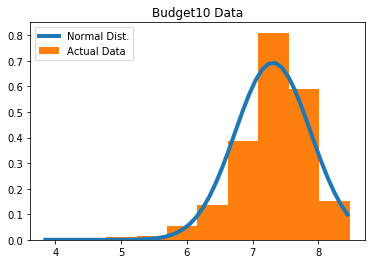

In [13]:
budget10Values = df['budget10'].values
xs = np.arange(budget10Values.min(), budget10Values.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(budget10Values), np.std(budget10Values))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(budget10Values, density=True, label='Actual Data');
plt.title('Budget10 Data')
plt.legend();

# code source: assignment 4

2) plotting distribution of the gross field

Text(0.5,1,'Gross Data')

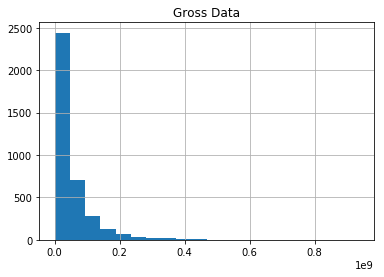

In [14]:
df.hist(column= 'gross', bins=20, )
plt.title('Gross Data')

The gross data is not normally distributed. We will perform a log transformation on the gross values and save the values in a new field called gross10

In [15]:
df['gross10'] = np.log10(df['gross'])

Now, we plot the gross10 data and compare it to a normal distribution

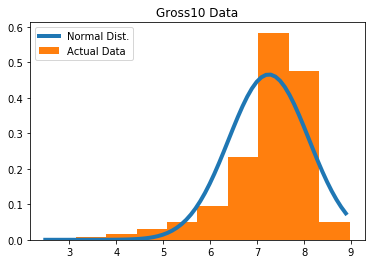

In [16]:

gross10Values = df['gross10'].values
xs = np.arange(gross10Values.min(), gross10Values.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(gross10Values), np.std(gross10Values))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(gross10Values, density=True, label='Actual Data');
plt.title('Gross10 Data')
plt.legend();

# code source: assignment 4

3) Third, we'll make a scatter plot where the budget10 represent the x-axis and gross10 represent the y-axis

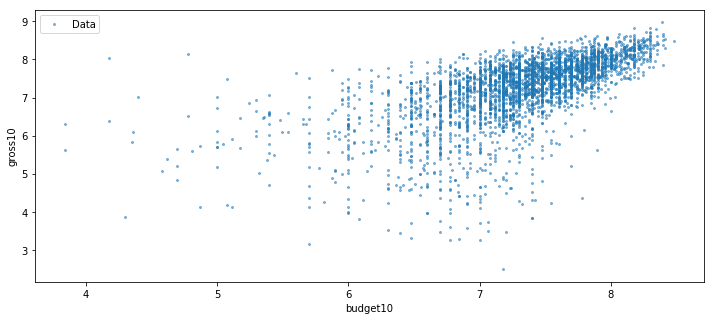

In [17]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
plt.scatter(df['budget10'], df['gross10'], alpha=0.5, label='Data', s=4);
plt.xlabel('budget10')
plt.ylabel('gross10')
plt.legend();


4) Finally , we're going to plot the distribution of the score field.

Text(0.5,1,'score Data')

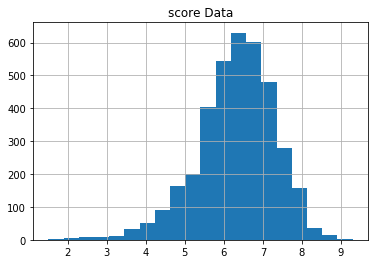

In [18]:
df.hist(column= 'score', bins=20, )
plt.title('score Data')

Comparing the score data to a normal distribution

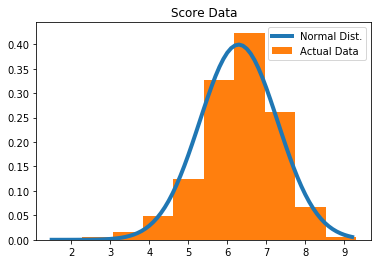

In [19]:
scoreValues = df['score'].values
xs = np.arange(scoreValues.min(), scoreValues.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(scoreValues), np.std(scoreValues))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(scoreValues, density=True, label='Actual Data');
plt.title('Score Data')
plt.legend();

# code source: assignment 4

# Data Analysis & Results

1) From the scatter plot above, we can see that there are some movies that have high budget but low gross income, while other movies generated high income with low budget. To identify these, we're going to add another field to our dataset that contains the ratio of gross10 over budget10 and the look at entries that have a ratio value that's one standard deviation below the mean.

In [20]:
df['gross10/budget10'] = df['gross10'] / df['budget10']
meanMinusStd = df['gross10/budget10'].mean() - df['gross10/budget10'].std()
meanPlusStd = df['gross10/budget10'].mean() + df['gross10/budget10'].std()
lowGross10OverBudget10 = df[df['gross10/budget10'] < meanMinusStd]
other = df[df['gross10/budget10'] >= meanMinusStd]

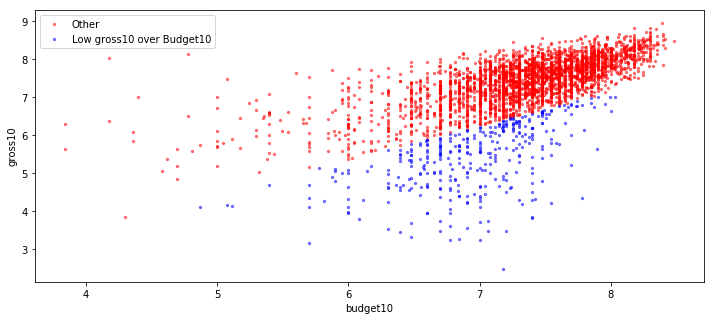

In [21]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
plt.scatter(other['budget10'], other['gross10'], alpha=0.5, color='red', 
            label='Other', s=5)
plt.scatter(lowGross10OverBudget10['budget10'], lowGross10OverBudget10['gross10'], 
            alpha=0.5, label='Low gross10 over Budget10',color='blue', s=5)
plt.xlabel('budget10')
plt.ylabel('gross10')
plt.legend();

In the above graph, the points with blue color represent movies with gross10 over budget10 ratio that's one standard deviation below the mean. These are the movies that we're interested in analyzing their characteristics. next, we'll find the ratio of movies with lowGross10OverBudget10 for each month and graph it

In [22]:
month_lowCounts = lowGross10OverBudget10['released_month'].value_counts()
month_lowRatio = []
for i in range(1, 13):
    ratio = (month_lowCounts.loc[i].item()) / len(df[df['released_month'] == i])
    month_lowRatio.append(ratio)

We'll combine the month_lowRatio array with an array that contains the months in a single dataframe, so we can plot it easily to make sense of the numbers

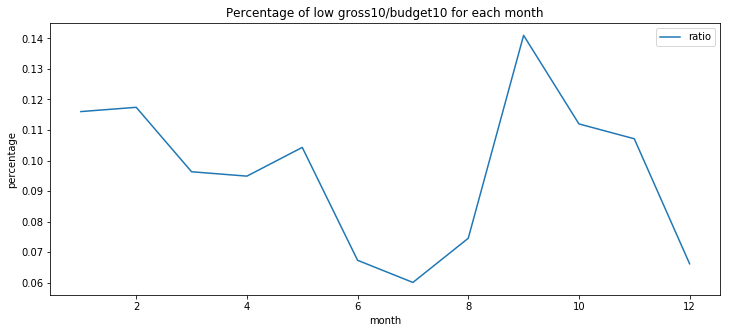

In [23]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
low_month_ratio_df = pd.DataFrame({'month':months,'ratio':month_lowRatio})

f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)

# generate a a legend
ax.plot(low_month_ratio_df['month'], low_month_ratio_df['ratio'])
ax.legend()

# add title and axis labels
ax.set_title('Percentage of low gross10/budget10 for each month')
ax.set_xlabel('month')
ax.set_ylabel('percentage');


The above graph suggests that the months of June, July, August and December have lower percentage of movies that have low gross over budget ratio compared to other months. It also suggests that the month of Spetember has the highest.

2) Next, we'll find the Percentage of movies with lowGross10OverBudget10 for each genre and graph it

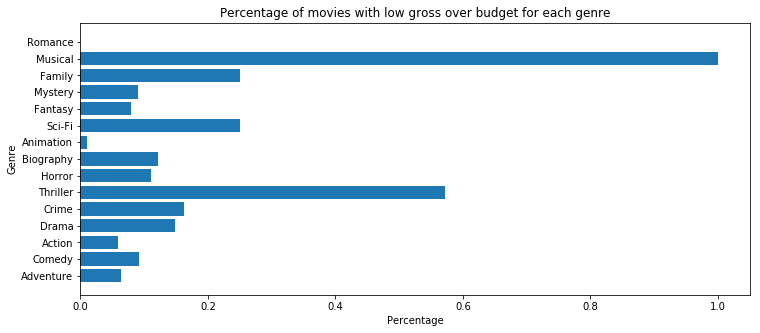

In [24]:
genreArr = df['genre'].unique()
month_lowRatio = []
genre_lowCounts = lowGross10OverBudget10['genre'].value_counts()
for i in genreArr:
    if i in genre_lowCounts:
        ratio = (genre_lowCounts.loc[i].item()) / len(df[df['genre'] == i])
        month_lowRatio.append(ratio)
    else:
        month_lowRatio.append(0)

low_genre_ratio_df = pd.DataFrame({"genre":genreArr, "ratio":month_lowRatio})

f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
plt.barh(low_genre_ratio_df['genre'], low_genre_ratio_df['ratio'], 
         align='center', alpha=1)
plt.xlabel('Percentage')
plt.ylabel('Genre')
plt.title('Percentage of movies with low gross over budget for each genre')

plt.show()

The above graph suggests that the genres of Romance and animation have lower percentage of movies that have low gross over budget ratio compared to other genres. It also suggests that the genres of Musical and Thriller have the highest

3) Comparing the score field of the movies that have low gross over budget ratio with all movies in the dataset. Then, we' ll model the relationship using linear regression to see if score is a good predictor of the gross income of a movie

Text(0.5,1,'Score Data - All Movies')

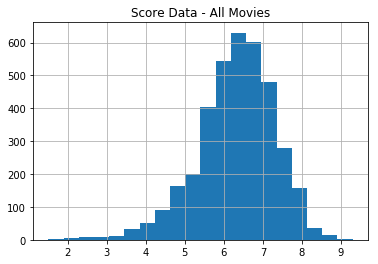

In [25]:
df.hist(column= 'score', bins=20, )
plt.title('Score Data - All Movies')

Text(0.5,1,'Score Data - Low Gross Over Budget Movies')

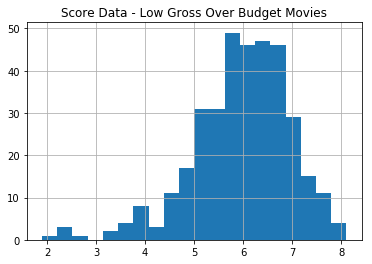

In [26]:
lowGross10OverBudget10.hist(column= 'score', bins=20, )
plt.title('Score Data - Low Gross Over Budget Movies')

In [27]:
df['score'].describe()

count    3726.000000
mean        6.291975
std         0.999201
min         1.500000
25%         5.700000
50%         6.400000
75%         7.000000
max         9.300000
Name: score, dtype: float64

In [28]:
lowGross10OverBudget10['score'].describe()

count    359.000000
mean       5.955989
std        0.994713
min        1.900000
25%        5.400000
50%        6.100000
75%        6.700000
max        8.100000
Name: score, dtype: float64

From the above results, we see that the difference between the means of the two groups is small with the same standard deviation. This suggests that the score is not a good predictor of the gross income. In the next part, we'll use linear regression to model the relationship.

In [29]:
outcome, predictors = patsy.dmatrices('gross10 ~ score', df)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                gross10   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           1.88e-34
Time:                        20:33:03   Log-Likelihood:                -4634.1
No. Observations:                3726   AIC:                             9272.
Df Residuals:                    3724   BIC:                             9285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1797      0.088     70.465      0.0

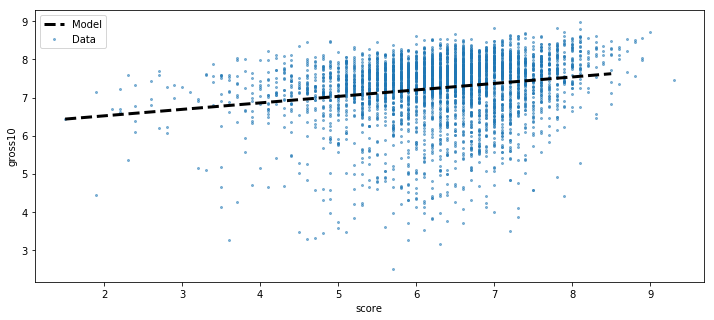

In [30]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
# Plot the orginal data (as before)
plt.scatter(df['score'], df['gross10'], alpha=0.5, label='Data', s=4);

# Generate and plot the model fit line
xs = np.arange(df['score'].min(), df['score'].max())
ys =  0.1702  * xs + 06.17975294
plt.plot(xs, ys, '--k', linewidth=3, label='Model')

plt.xlabel('score')
plt.ylabel('gross10')
plt.legend();

The above results say that for every one unit increase in score, the gross will increase by 0.0017. This clearly indicates that the score (IMDb user rating) is a poor predictor of the gross income of a movie. This can be seen also from the above the graph as the slope of the fit line is almost horizontal.  

4) Finally, comparing the budget field of the movies that have low gross over budget ratio with all the movies. Then, we' ll model the relationship using linear regression to see if budget is a good predictor of the gross income of a movie

Text(0.5,1,'Budget Data - All movies')

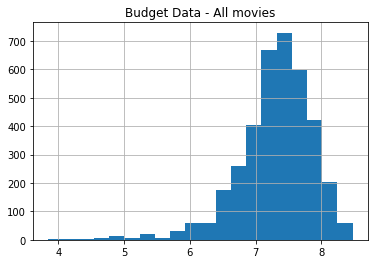

In [31]:
df.hist(column= 'budget10', bins=20, )
plt.title('Budget Data - All movies')

Text(0.5,1,'Budget Data - Low Gross Over Budget Movies')

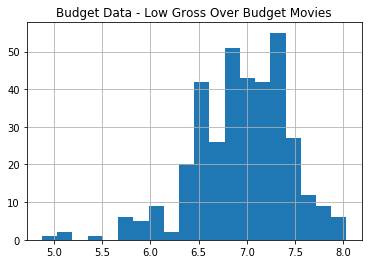

In [32]:
lowGross10OverBudget10.hist(column= 'budget10', bins=20, )
plt.title('Budget Data - Low Gross Over Budget Movies')

In [33]:
df['budget'].describe()

count    3.726000e+03
mean     3.755996e+07
std      4.058167e+07
min      7.000000e+03
25%      1.100000e+07
50%      2.500000e+07
75%      5.000000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [34]:
lowGross10OverBudget10['budget'].describe()

count    3.590000e+02
mean     1.521071e+07
std      1.671017e+07
min      7.500000e+04
25%      4.500000e+06
50%      1.000000e+07
75%      2.000000e+07
max      1.080000e+08
Name: budget, dtype: float64

From the above results, we see that the means for the two groups is different. the mean for the all the movies is above 37.5 millions while the movies with low gross over budget ratio is 15.2 millions. In the next part, we'll use linear regression to model the relationship.

In [35]:
outcome, predictors = patsy.dmatrices('gross10 ~ budget10', df)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                gross10   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     2303.
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:33:04   Log-Likelihood:                -3812.2
No. Observations:                3726   AIC:                             7628.
Df Residuals:                    3724   BIC:                             7641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5294      0.141      3.768      0.0

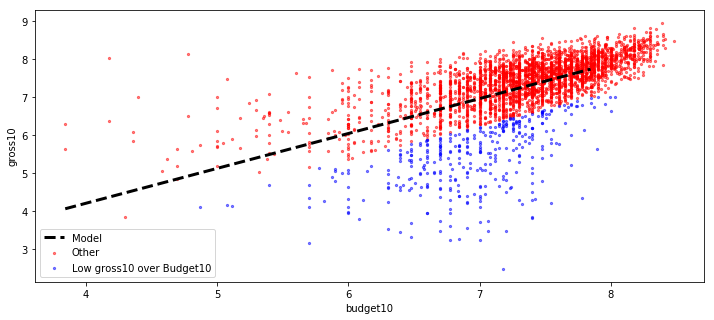

In [36]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 1, 1)
plt.scatter(other['budget10'], other['gross10'], alpha=0.5,color='red', 
            label='Other', s=5)
plt.scatter(lowGross10OverBudget10['budget10'], lowGross10OverBudget10['gross10'],
            alpha=0.5, label='Low gross10 over Budget10',color='blue', s=5);

# Generate and plot the model fit line
xs = np.arange(df['budget10'].min(), df['budget10'].max())
ys =  0.9196  * xs + 0.5294
plt.plot(xs, ys, '--k', linewidth=3,color ='black', label='Model')

plt.xlabel('budget10')
plt.ylabel('gross10')
plt.legend();

The above results say that for every one percent increase in budget, the gross will increase by 0.9. This clearly indicates that the budget is a good predictor of the gross income in general, but that does not hold for the movies that have low gross over budget ratio.

# Ethics & Privacy

Because of the open nature of movies, we did not have to obtain permission to use this data. We do not believe that there are any privacy concerns we need to make as our topic does not invade anyone’s personal privacy and does not put anyone in harm in any way. Our question in and of itself does not concern anybody involved in the production of the movies. Our analysis will also be focused entirely on the movie’s performance so no personal information will be revealed and is completely separate from implying anything on a single social group. Our dataset contains three decades of movie data divided as 220 movies per year. In each year, there are thousands of movies produced in the United States, so this small sample of 220 movies per year could introduce some unintended biases. In addition, there could be biases outside of our control as most movies are made up of a primarily Caucasian cast or star a Caucasian actor. We have no plan to secure our data as only we and the graders will have access to the data. As we did not make the dataset ourselves, we have no right to delete the data due to the fact that it is publicly available. Because the data will not change, we have full confidence that the results are reproducible.

We can see that the results of our data could be used to predict how well a movie will perform in the box office based on the timing of its release. As a result of our findings, companies would move to releasing their movies during seasons when people are more free to go watch them. This could potentially lead to a saturation of movie releases during this season and a drought outside of it. As we learned, this already does happen to some extent as there are dump months when movies expected to not do as well are released though there are rare exceptions to this. Possibly, a studio could take advantage of this and release a movie that has a high-budget but may not have done that well on test screenings. Studios could profit from these findings, but we have no way to guard against this as we believe that this is not new knowledge to the industry.


# Conclusion & Discussion

In our project, we focused on the movies with low gross income over budget ratio and tried to find if there any characteristics that distinguish them from other movies. Our dataset contains movie data through three decades (1986-2016), scraped from IMDB using Python by the owner. The dataset consists of 6820 (220 movies per year). We hypothesized that movies with low gross over budget ratio will most likely not be released during the holiday season (summer vacation, and christmas break). In additoin these movies will have low viewer rating and will be mainly of certain genres.

Our analysis confirmed our prediction about the time of release. Our results suggests that the months of June, July, August and December have lower percentage of movies that have low gross over budget ratio compared to other months. When it comes to genres, our analysis found that movies produced under the genre of musical will most likely underperform compared to films of other genres. Also, the genre of animation has the lowest percentage of movies that have low gross over budget ratio compared to other genres. The analysis of score (IMDb user rating) indicated that our prediction about it was incorrect. We used linear regression and found that the score is a poor predictor of the gross income of a movie, and we found that for every one unit increase in score, the gross will increase by 0.0017. We also used linear regression to model the relationship between the gross income and budget and found for every one percent increase in budget, the gross will increase by 0.9. This indicates that the budget is a good predictor of the gross income in general, but that does not hold for the movies that have low gross over budget ratio.  

There are many limitations to our project. We did not consider the effect of many important factors like the effect of stars acting in a movie. Our project did not study the correlation between stars and success which could be an important factor. Another important factor that our project ignores is the duration of the movie. The run time of a movie could be a crucial factor as it may discourage or encourage a viewer. We also did not consider external factors which could affect our results, such as the state of economy and the political climate during the release of each movie. The dataset we used also has many limitations. Our dataset contains three decades of movie data divided as 220 movies per year. In each year, there are thousands of movies produced in the United States, so this small sample of 220 movies per year could lead to inaccurate results. 